In [4]:
from math import log
import operator
import pickle
import matplotlib.pyplot as plt

In [5]:
# 测试用  如果这么详细的注释还不懂  可用pycharm  Debug一下
def creatDataSet():
    dataSet = [[1, 1, 'yes'],
              [1,1,'yes'],
              [1, 0, 'no'],
              [0, 1, 'no'],
              [0, 0, 'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

In [6]:
myDat, labels = creatDataSet()
print(myDat)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 0, 'no']]


In [7]:
# 一、计算给定数据集的香农熵（信息增益）增益最高即是最好的划分特征选择
def calcShannonEnt(dataSet):
    # 求list的长度，表示计算参与训练的数据量
    numEntries = len(dataSet)
    # 计算分类标签label出现的次数
    labelCounts = {}
    # the number of unique elements and their occurance
    for featVec in dataSet:
        # 将当前实例的标签存储，即每一行数据的最后一个数据代表的是标签
        currentLabel = featVec[-1]
        # 为所有可能的分类创建字典，如果当前的健值不存在，则扩展字典并将当前健值加入
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    # 对于label标签的占比，求出label标签的香农墒
    shannonEnt = 0.0
    for key in labelCounts:
        # 使所有类标签的发生频率计算类别出现的概率
        prob = float(labelCounts[key]) / numEntries
        shannonEnt -= prob * log(prob, 2)
    return shannonEnt

In [8]:
# 二、划分数据集
def spiltDataSet(dataSet, axis, value): # 待划分的数据集、划分数据集的特征、需要返回的特征的值
    retDataSet = []  # 新建list
    for featVec in dataSet:
        if featVec[axis] == value:  # 抽取
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis + 1:])  # 把featVec全部添加到reducedFeatVec里
            retDataSet.append(reducedFeatVec)  # 把reducedFeatVec全部添加到retDataSet里
    return retDataSet  # 返回一个list

In [9]:
# 三、选择最好的数据集划分方式（实现选取特征，划分数据集，计算得出最好的划分数据集的特征）
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1 # 特征个数
    baseEntropy = calcShannonEnt(dataSet)  # 数据集的原始香农熵
    bestInfoGain = 0.0
    bestFeature = 0
    for i in range(numFeatures):  # 循环遍历数据集中的所有第i个特征
        # 使用列表推导来创建新的列表 将数据集中所有第i个特征值或者所有可能存在的值写入这个新list中
        featList = [example[i] for example in dataSet] # [每个example中第i个特征组成的list]
        uniqueVals = set(featList) # 转换成集合数据类型{把相同的特征值统计为一个}
        newEntropy = 0.0
        for value in uniqueVals:  # 遍历当前特征中的所有唯一属性值
            subDataSet = spiltDataSet(dataSet, i, value)  # 对每个特征划分一次数据集
            prob = len(subDataSet) / float(len(dataSet))  # 计算概率
            newEntropy += prob * calcShannonEnt(subDataSet)  # 计算新的熵 并求和
        infoGain = baseEntropy - newEntropy  # 原始的和划分后的熵的差值
        if (infoGain > bestInfoGain):  # 比较差值和最好的熵值
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature  # 返回最好特征划分的索引值

In [10]:
print(calcShannonEnt(myDat))

0.9709505944546686


In [11]:
print(chooseBestFeatureToSplit(myDat))

0


In [12]:
# 多数表决
def majorityCnt(classList):
    classCount = {}
    for vote in classCount:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]  # 返回出现次数最多的分类名称

In [13]:
# 四、创建树的函数代码
def creatTree(dataSet, labels):  # 数据集和标签列表(包含了数据集中所有特征的标签)
    classList = [example[-1] for example in dataSet]  # 使用列表推导来创建列表变量（包含了数据集的所有类标签）
    # 所有的类标签完全相同，则直接返回该类标签（递归函数第一个停止条件）
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 使用完了所有特征，仍然不能将数据集划分成仅包含唯一类别的分组（挑选出现次数最多的类别作为返回值）（递归函数第二个停止条件）
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)

    bestFeat = chooseBestFeatureToSplit(dataSet)  # 最好的特征
    bestFeatLabel = labels[bestFeat]  # 最好的类标签
    myTree = {bestFeatLabel:{}}  # 字典变量myTree存储了树的所有信息
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)  # 最好的特征的唯一特征值
    for value in uniqueVals:
        subLabels = labels[:]  # 复制了类标签
        myTree[bestFeatLabel][value] = creatTree(spiltDataSet(dataSet, bestFeat, value), subLabels)  # 递归
    return myTree
# 以上为创建决策树的流程

In [14]:
# 五、绘制注释树
decisionNode = dict(boxstyle='sawtooth', fc='0.8')  # 定义文本框和箭头格式
leafNode = dict(boxstyle='round4', fc='0.8')
arrow_args = dict(arrowstyle='<-')

def plotNode(nodeTxt, centerPt, parentPt, nodeType):  # 绘制带箭头的注释
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',
                            xytext=centerPt, textcoords='axes fraction',
                            va='center', ha='center', bbox=nodeType,
                            arrowprops=arrow_args)
# 获取叶节点的数目和树的层数
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]  # 第一属性
    secondDict = myTree[firstStr]      # 第二属性
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':  # 测试以查看节点是否为dict，如果不是，则它们是叶节点。
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':  # 测试以查看节点是否为dict，如果不是，则它们是叶节点。
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

#  用于测试
def retrieveTree(i):
    listOfTrees = [{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                   {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                   ]
    return listOfTrees[i]

# 在父子节点中间添加文本信息
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)


def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)  # 宽
    depth = getTreeDepth(myTree)    # 高
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD


def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

[['young', 'myope', 'no', 'reduced', 'no lenses'], ['young', 'myope', 'no', 'normal', 'soft'], ['young', 'myope', 'yes', 'reduced', 'no lenses'], ['young', 'myope', 'yes', 'normal', 'hard'], ['young', 'hyper', 'no', 'reduced', 'no lenses'], ['young', 'hyper', 'no', 'normal', 'soft'], ['young', 'hyper', 'yes', 'reduced', 'no lenses'], ['young', 'hyper', 'yes', 'normal', 'hard'], ['pre', 'myope', 'no', 'reduced', 'no lenses'], ['pre', 'myope', 'no', 'normal', 'soft'], ['pre', 'myope', 'yes', 'reduced', 'no lenses'], ['pre', 'myope', 'yes', 'normal', 'hard'], ['pre', 'hyper', 'no', 'reduced', 'no lenses'], ['pre', 'hyper', 'no', 'normal', 'soft'], ['pre', 'hyper', 'yes', 'reduced', 'no lenses'], ['pre', 'hyper', 'yes', 'normal', 'no lenses'], ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'no', 'normal', 'no lenses'], ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'yes', 'normal', 'hard'], ['presbyopic', 'hyper', 'no', 'redu

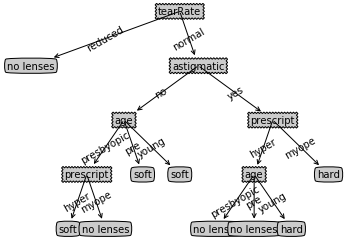

In [15]:
if __name__ == '__main__':
    fr = open(r'C:\Users\zhengshihu\Desktop\文件\MachineLearning\03决策树\lenses.txt')
    lenses = [inst.strip().split('\t') for inst in fr.readlines()]
    print(lenses)
    lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
    lensesTree = creatTree(lenses, lensesLabels)
    print(lensesTree)
    createPlot(lensesTree)